**Project Overview**:

The healthcare industry has long struggled with employee burnout, a challenge that worsened dramatically during the COVID-19 pandemic. To address this issue, we’ve utilized a synthetic dataset, provided by Creative Commons, which was generated using probabilistic mappings to simulate realistic distributions based on healthcare industry research. ChatGPT was leveraged for conceptual guidance, ensuring the dataset's structure and realism were validated. It's important to note that this dataset is synthetic, meaning it does not reflect actual employee data.

In this project, we will apply classification machine learning techniques to explore the dataset, aiming to uncover key relationships between the dependent variable—turnover intention—and several independent variables. By identifying indicators that lead to employee turnover, this analysis seeks to offer insights that could help fictional hospital management reduce turnover and retain valuable staff.

**Dataset Overview**:

Employee ID: A unique identifier assigned to each employee for distinction purposes.

Employee Type: Describes the employee's role or occupation within the hospital.

Department: Indicates the specific department where the employee works.

Workplace Factor: Identifies the most negative aspect of the job from the employee’s perspective.

Stress Level: A numeric scale (1-9) that quantifies the employee’s perceived stress level.

Burnout Frequency: A categorical variable indicating how often the employee experiences burnout (Options: Often, Occasionally, Never).

Job Satisfaction: A rating scale (1-5) reflecting how satisfied the employee is with their job, with 1 being the lowest rating.

Access to EAPs (Employee Assistance Programs): A boolean value indicating whether the employee has access to confidential EAP services for personal or work-related issues.

Mental Health Absences: The number of days the employee has taken off for mental health reasons.

Turnover Intention: The dependent variable we aim to predict, which represents the likelihood of an employee’s intention to leave the organization.

Through the use of machine learning techniques, the goal of this project is to identify patterns and correlations within the data that can help improve employee retention strategies in the healthcare industry.



The first step in our exploration involves importing the libraries required for this analysis. These libraries cover a range of essential tasks, including data manipulation, machine learning model implementation, and evaluation techniques. We will import:

Libraries for data operations (such as pandas, numpy).
Machine learning models and algorithms (like scikit-learn).
Evaluation metrics and techniques to assess the performance of our models.
By setting up these foundational tools, we can efficiently manipulate the data, build models, and evaluate their effectiveness in predicting turnover intention.

In [ ]:
# For Data related operations
import pandas as pd
import numpy as np

#Data Visualization libraries
import seaborn as sns
from matplotlib import pyplot as plt

# DecisionTree Model
from sklearn.tree import DecisionTreeRegressor

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#RandomForest Regression Classifier Model
from sklearn.ensemble import RandomForestClassifier

# Data scaling (Optional)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import library for preparing data
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Importing the r2_score, mean_squared_error, and mean_absolute_error functions
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Import classification_report and confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

#Import recall_score explicitly
from sklearn.metrics import recall_score

# Choose the type of classifier
from sklearn.model_selection import GridSearchCV # Import GridSearchCV



from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Our first task is to create a DataFrame to work with, which will serve as the foundation for our analysis.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Portfolio/Classification/Healthcare Workforce Mental Health Dataset.csv")

After creating the initial DataFrame, we will make a copy of it for manipulation and analysis.

In [ ]:
HR=data.copy()

Next, let's take a look at the structure of the DataFrame to understand its composition.

In [ ]:
print("There are", HR.shape[0],"records and", HR.shape[1],"features in the data")

There are 5000 records and 10 features in the data


We can use the head() function to display the first few rows and get an overview of the data.

In [ ]:
HR.head()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


One key observation is that the Employee ID feature does not have any relevance to the dependent variable (turnover intention), so we won't consider it in our analysis.

To dive deeper into the dataset, we will use the info() function to inspect the data types of each feature. This will help us understand the nature of the variables we're working with.

In [ ]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee ID             5000 non-null   object
 1   Employee Type           5000 non-null   object
 2   Department              5000 non-null   object
 3   Workplace Factor        5000 non-null   object
 4   Stress Level            5000 non-null   int64 
 5   Burnout Frequency       5000 non-null   object
 6   Job Satisfaction        5000 non-null   int64 
 7   Access to EAPs          5000 non-null   object
 8   Mental Health Absences  5000 non-null   int64 
 9   Turnover Intention      5000 non-null   object
dtypes: int64(3), object(7)
memory usage: 390.8+ KB


One key observation is that the Employee ID feature does not have any relevance to the dependent variable (turnover intention), so we won't consider it in our analysis.

In [ ]:
HR.drop('Employee ID',axis=1,inplace=True)

We will then apply the describe() function to obtain summary statistics of the numerical columns.

In [ ]:
HR.describe().T

,count,mean,std,min,25%,50%,75%,max
Stress Level,5000.0,7.3278,1.407673,4.0,7.0,8.0,8.0,9.0
Job Satisfaction,5000.0,2.2022,1.045722,1.0,1.0,2.0,3.0,5.0
Mental Health Absences,5000.0,7.3962,2.878625,0.0,5.0,7.0,9.0,19.0


From the output, we can see that the average stress level is approximately 7.3, with a maximum value of 9. This suggests a high level of stress among the staff. Job satisfaction, on the other hand, is quite low, with an average score of 2.2 (on a scale from 1 to 5), indicating overall dissatisfaction. Mental health absences average at 7 days, with some employees not taking any days off, while the maximum number of days taken is 19. These statistics suggest a challenging and unhealthy work environment for the medical staff.


To ensure our data is ready for analysis, we will check for any missing values using the isnull().sum() function.

In [ ]:
HR.isnull().sum()

,0
Employee Type,0
Department,0
Workplace Factor,0
Stress Level,0
Burnout Frequency,0
Job Satisfaction,0
Access to EAPs,0
Mental Health Absences,0
Turnover Intention,0


Fortunately, we find that there are no null values, which simplifies the model-building process.

Here we will be useing the unuique function.

In [ ]:
HR.nunique()

,0
Employee Type,10
Department,10
Workplace Factor,8
Stress Level,6
Burnout Frequency,3
Job Satisfaction,5
Access to EAPs,2
Mental Health Absences,20
Turnover Intention,2


Using the nunique function, we identify:
* 10 distinct employee types
* 10 different departments
* 8 workplace factor options selected by employees

To facilitate our exploratory data analysis (EDA), we will create two separate dataframes:
1. A dataframe for categorical features (cat_col), which contains object-oriented or string-based data.
2. A dataframe for numerical features (num_col), which consists of quantitative data.
This separation allows us to apply different techniques to analyze numerical and categorical data effectively.

In [ ]:
cat_col = HR.select_dtypes(include='object').columns
num_col = HR.select_dtypes(exclude='object').columns

To facilitate our exploratory data analysis (EDA), we will create two separate dataframes:
1. A dataframe for categorical features (cat_col), which contains object-oriented or string-based data.
2. A dataframe for numerical features (num_col), which consists of quantitative data.

This separation allows us to apply different techniques to analyze numerical and categorical data effectively.

The code below helps us analyze the frequency of categorical features.

In [ ]:
for column in cat_col:
    print(data[column].value_counts(1))
    print("-" * 50)

Employee Type
Registered Nurse            0.2566
Medical Assistant           0.1026
Healthcare Administrator    0.1014
Nursing Assistant           0.1004
Critical Care Nurse         0.0976
Radiology Technician        0.0752
Physician (General)         0.0744
Laboratory Technician       0.0708
Physician (Specialist)      0.0686
Pediatric Nurse             0.0524
Name: proportion, dtype: float64
--------------------------------------------------
Department
General Medicine       0.2566
Outpatient Services    0.1026
Administration         0.1014
Assisted Living        0.1004
ICU                    0.0976
Radiology              0.0752
General Practice       0.0744
Laboratory             0.0708
Specialty Care         0.0686
Pediatrics             0.0524
Name: proportion, dtype: float64
--------------------------------------------------
Workplace Factor
Heavy Workload              0.4276
Poor Work Environment       0.2244
Career Stagnation           0.1062
Safety Concerns             0.0830


Key findings:
* Employee Type: Registered nurses make up the largest group, comprising 25% of employees. Other occupations are evenly distributed, each representing 5%-10% of the dataset.
* Department: General medicine is the most represented department, accounting for 25% of employees, while other departments are distributed between 5%-10%.
* Workplace Factors: Over 70% of employees express concerns about mismanagement, with the primary concerns being:
    * Heavy Workload (42%)
    * Poor Work Environment (22%)
    * Career Stagnation (10%)
* Burnout Frequency:
    * 44% of employees report experiencing burnout "often"
    * 38% report burnout "occasionally"
    * Only 16% report "never" experiencing burnout
* Employee Assistance Programs (EAP): 70% of employees have access to an EAP.
* Turnover Rate: High, with 66% of employees leaving.

To further explore the numerical features, we generate histograms and boxplots using this function below.

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 8), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.30, 0.70)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "red"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "blue", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

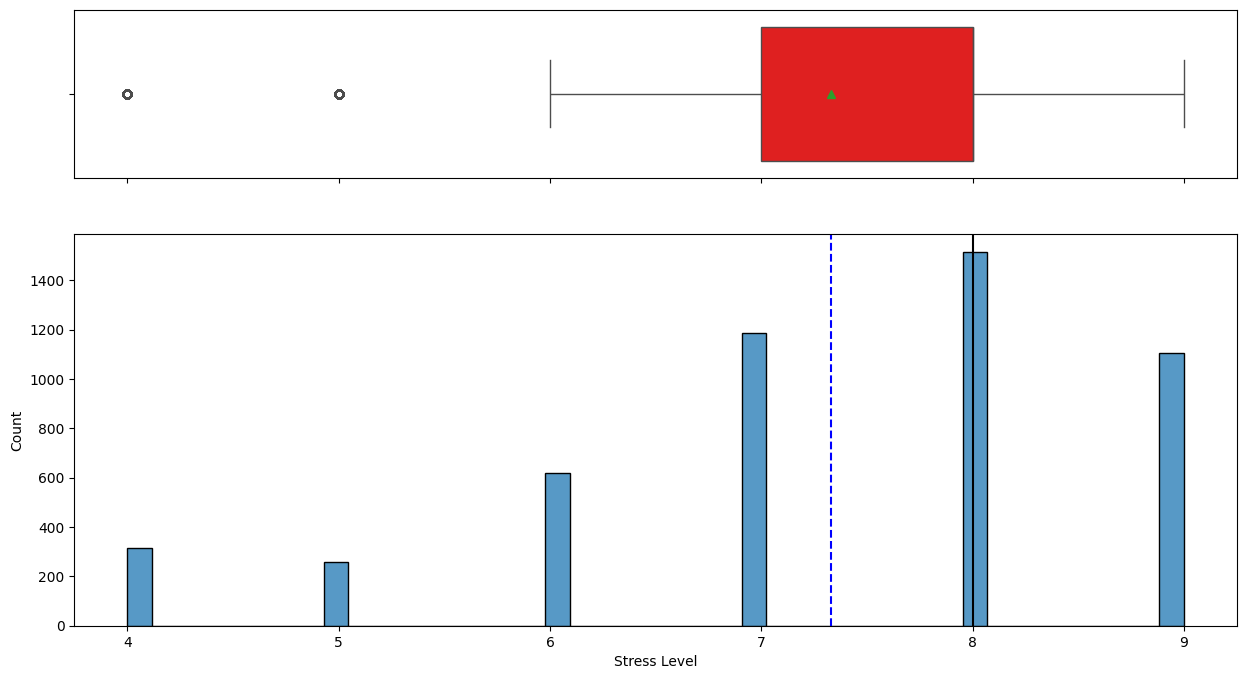

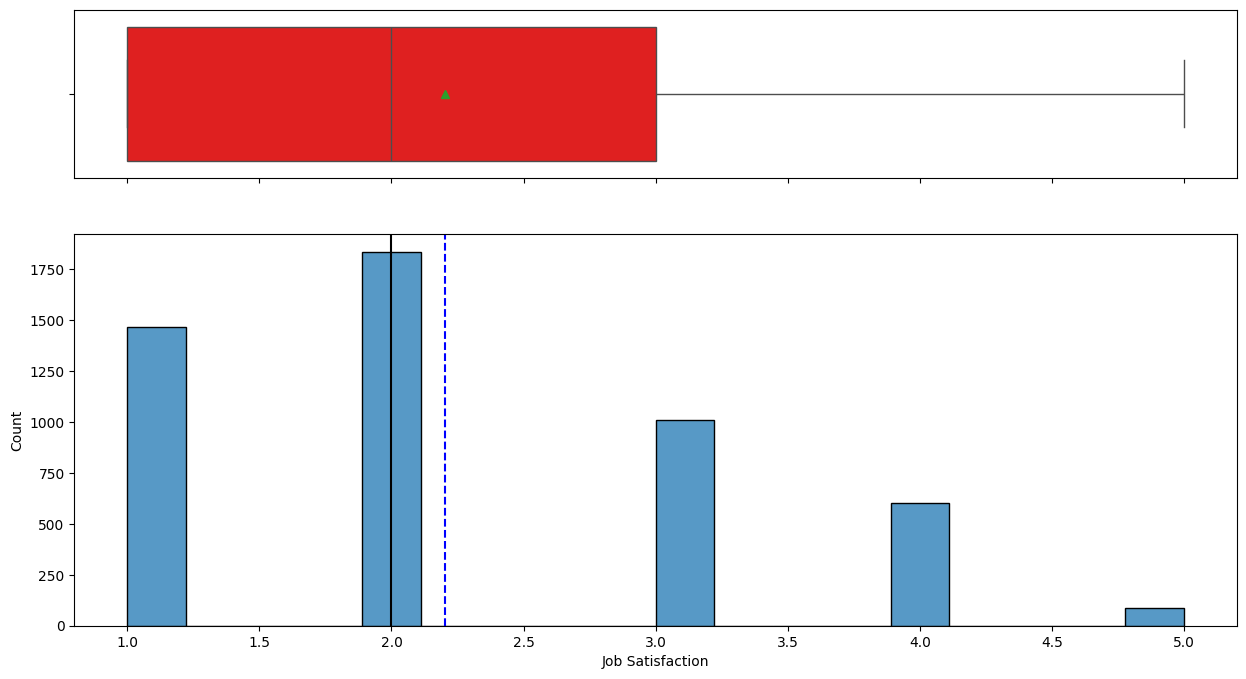

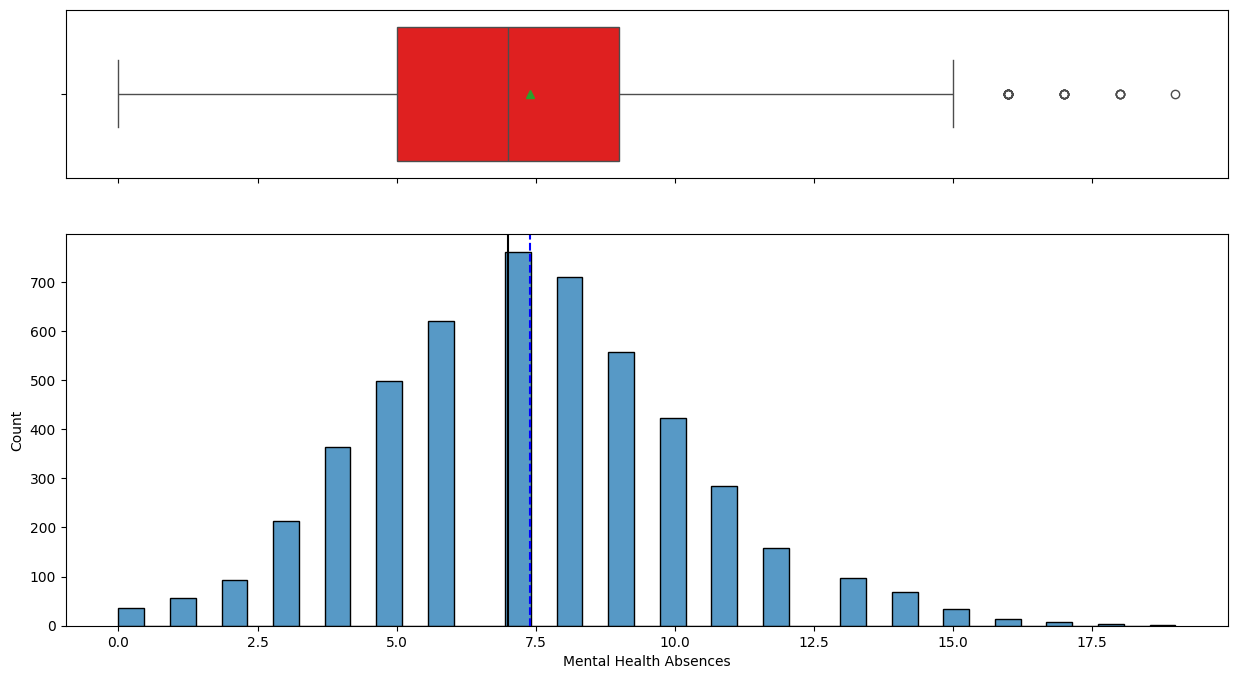

In [ ]:
for column in num_col:
    histogram_boxplot(HR,column)

Insights found:
* Stress Levels: Skewed left, indicating high stress among employees.
* Job Satisfaction: Skewed right, with very few ratings above 4.
* Mental Health Absences: More evenly distributed, with a median around 7 days. Some employees exceed 15 absences, indicating outliers.

Next, we create a heatmap to analyze correlations among numerical features.

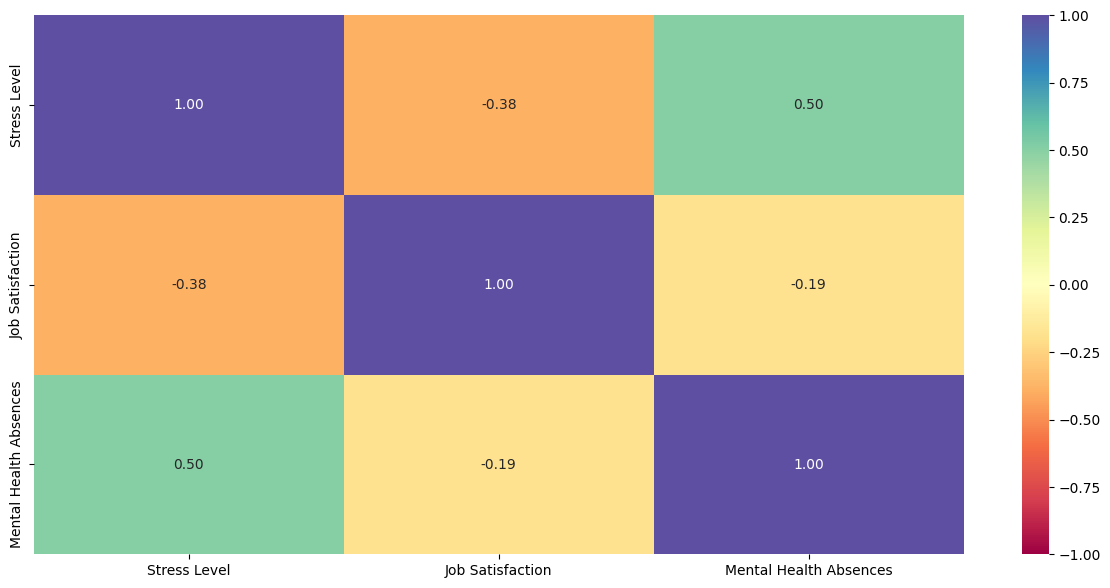

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(HR[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

We then create a heatmap to analyze correlations among numerical features. A moderate relationship (r = 0.5) exists between mental health absences and stress levels, indicating that employees with higher stress levels tend to take more mental health-related absences. However, other numerical features show no strong correlations.

Next, we generate a pairplot to compare numerical variables, using the hue parameter to analyze turnover intention.

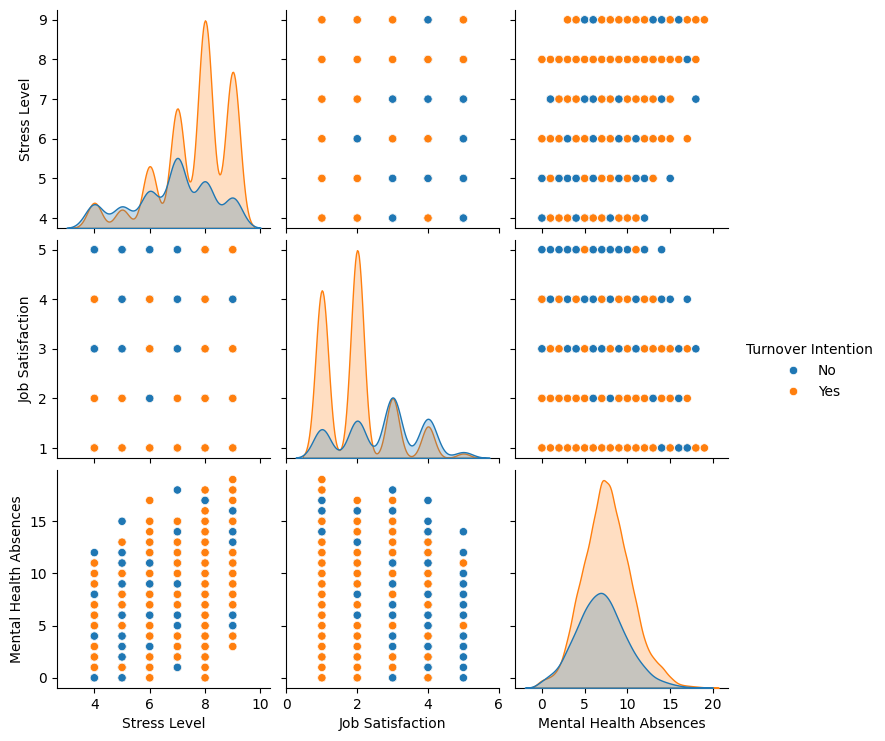

In [ ]:
sns.pairplot(HR, hue ='Turnover Intention')

Insights from the pairplot:

High stress levels correlate with turnover.
Low job satisfaction also correlates with turnover.

To assess categorical variables' relationship with turnover, we create a stacked bar plot.

we can do this by creating a function for a stacked barplot.

In [ ]:
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

Turnover Intention          No   Yes   All
Employee Type                             
All                       1665  3335  5000
Registered Nurse           389   894  1283
Healthcare Administrator   230   277   507
Medical Assistant          165   348   513
Nursing Assistant          159   343   502
Laboratory Technician      143   211   354
Critical Care Nurse        141   347   488
Radiology Technician       138   238   376
Physician (Specialist)     123   220   343
Physician (General)         94   278   372
Pediatric Nurse             83   179   262
------------------------------------------------------------------------------------------------------------------------


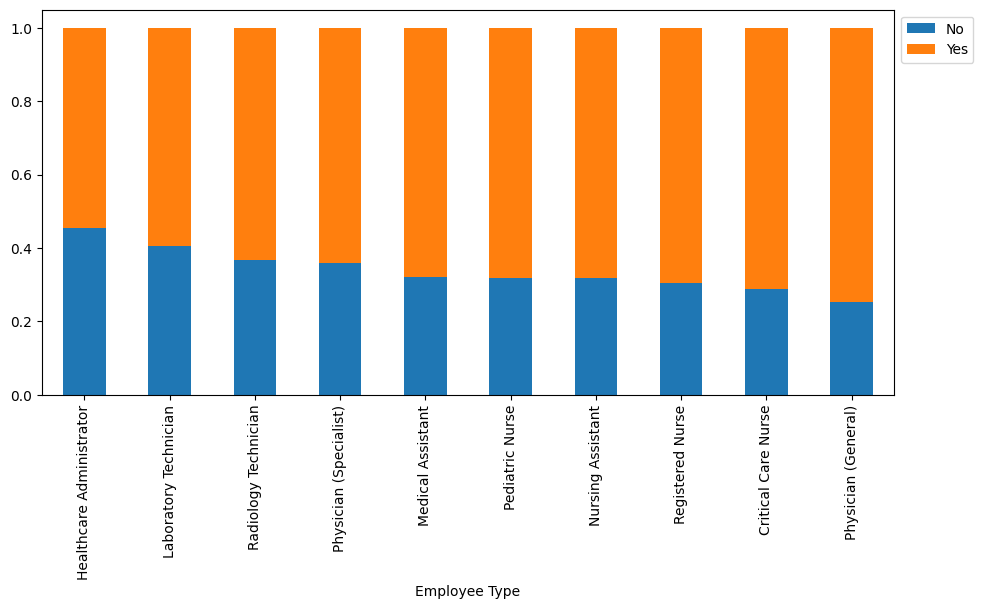

Turnover Intention     No   Yes   All
Department                           
All                  1665  3335  5000
General Medicine      389   894  1283
Administration        230   277   507
Outpatient Services   165   348   513
Assisted Living       159   343   502
Laboratory            143   211   354
ICU                   141   347   488
Radiology             138   238   376
Specialty Care        123   220   343
General Practice       94   278   372
Pediatrics             83   179   262
------------------------------------------------------------------------------------------------------------------------


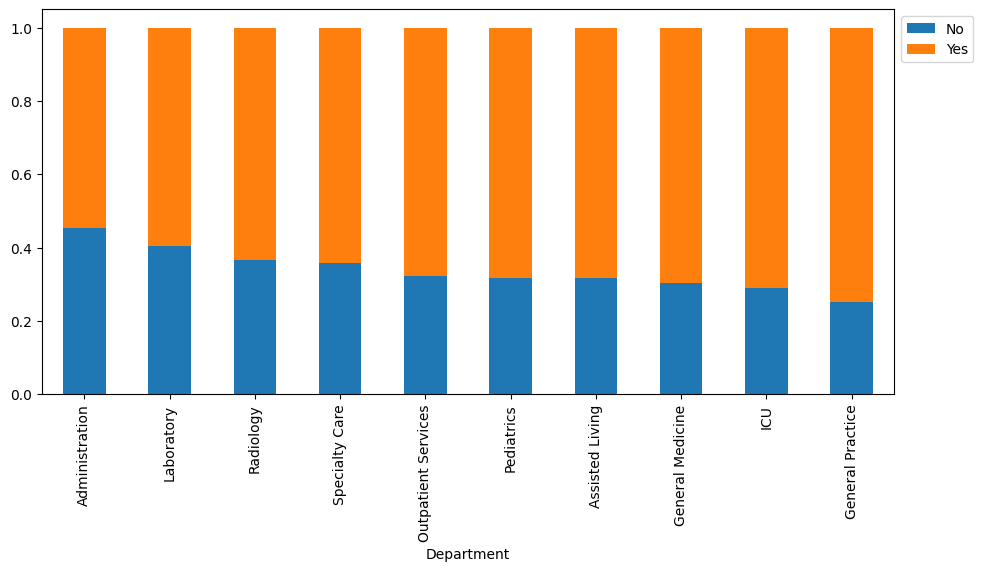

Turnover Intention          No   Yes   All
Workplace Factor                          
All                       1665  3335  5000
Heavy Workload             554  1584  2138
Poor Work Environment      422   700  1122
Career Stagnation          283   248   531
Safety Concerns            126   289   415
Emotional Demands           88   135   223
Unclear Job Expectations    76    70   146
Work-Life Imbalance         73   267   340
Job Insecurity              43    42    85
------------------------------------------------------------------------------------------------------------------------


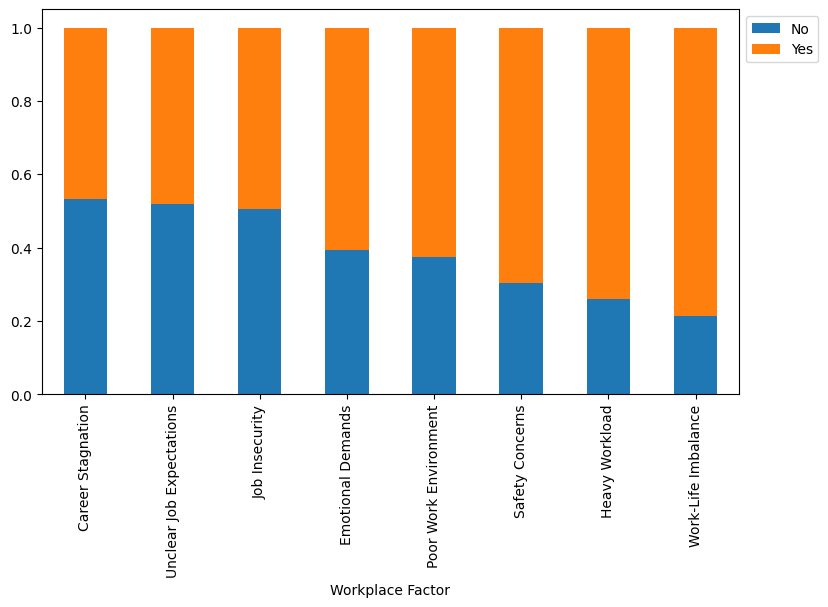

Turnover Intention    No   Yes   All
Burnout Frequency                   
All                 1665  3335  5000
Occasionally         736  1205  1941
Often                536  1685  2221
Never                393   445   838
------------------------------------------------------------------------------------------------------------------------


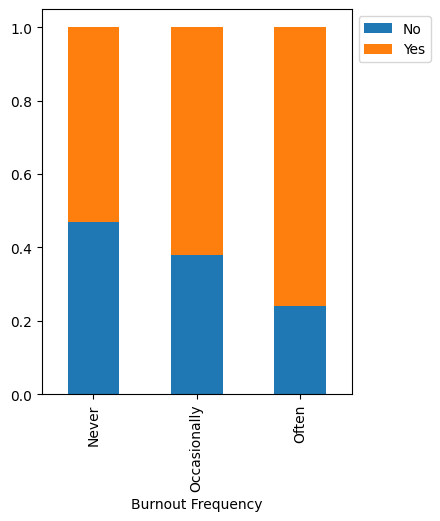

Turnover Intention    No   Yes   All
Access to EAPs                      
All                 1665  3335  5000
Yes                 1179  2415  3594
No                   486   920  1406
------------------------------------------------------------------------------------------------------------------------


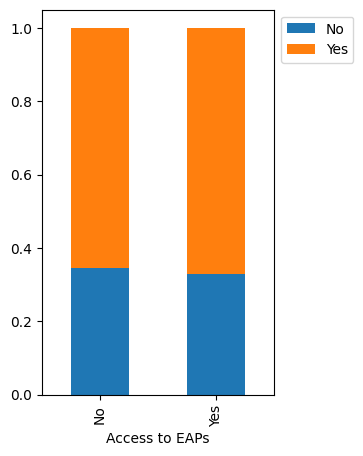

Turnover Intention    No   Yes   All
Turnover Intention                  
No                  1665     0  1665
All                 1665  3335  5000
Yes                    0  3335  3335
------------------------------------------------------------------------------------------------------------------------


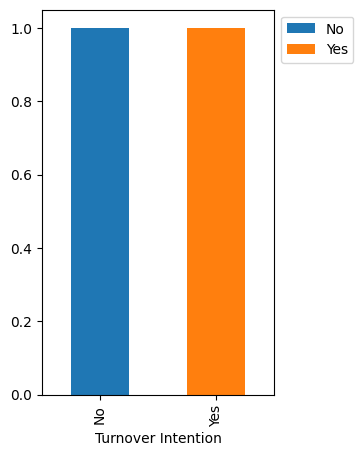

In [ ]:
for column in cat_col:
    stacked_barplot(HR,column, "Turnover Intention")

Key observations:

Employee type, department, and EAP access do not significantly impact turnover.
Burnout frequency is a strong indicator—employees experiencing burnout "often" are more likely to leave. Heavy workload shows a slight correlation with employee turnover, suggesting that excessive workload may contribute to higher attrition rates.


Building Our Classification Models:

Now, we will proceed with developing our classification models as part of our data analysis. We will implement and evaluate two models:

Decision Tree Classifier – A simple yet interpretable model that splits data based on feature values to classify observations.

Random Forest Classifier – An ensemble learning method that improves accuracy and reduces overfitting by aggregating multiple decision trees.

We will train these models on our dataset, fine-tune hyperparameters, and evaluate their performance using classification metrics such as accuracy, precision, recall, and F1-score. Our goal is to determine which model provides the most reliable and generalizable results for our classification task.

Let’s move forward with model implementation!




Our first step is to convert the data types of integer columns to float. Floats offer greateer precision and flexibility for calculation and mathmentical operations.

In [ ]:
#converting data types of integer columns to float
for column in ['Stress Level', 'Job Satisfaction', 'Mental Health Absences']:
    HR[column]=HR[column].astype('float')

Preparing Data for Classification Modeling
This code prepares the dataset for training a classification model by performing the following steps:

Feature and Target Separation:

Creates X, a dataframe containing all features except the "Turnover Intention" column (target variable).
Defines Y, a series containing only the "Turnover Intention" column, which represents the labels for classification.
Encoding Categorical Variables:

Uses pd.get_dummies(X, drop_first=True) to convert categorical features into binary (0/1) variables.
The drop_first=True parameter helps avoid multicollinearity by removing redundant dummy variables.
Splitting Data into Training and Testing Sets:

Uses train_test_split() to divide the dataset into:
70% training data (X_train, y_train) for model training.
30% test data (X_test, y_test) for model evaluation.
random_state=1 ensures reproducibility, so the data split remains consistent across runs.
This preprocessing step is crucial for ensuring that the model is trained effectively and can generalize well to unseen data.

In [ ]:

# make a copy called X which is a dataframe with "status" column removed
X = HR.drop(columns = 'Turnover Intention')

# Y is a series containing the "status" (column)
Y = HR['Turnover Intention']

# Creating dummy variables, drop_first=True is used to avoid redundant variables
#pd.get_dummies => working on X dataframe converts all categorical variables into binary 1(yes) / 0(no).

X = pd.get_dummies(X)

# Splitting the data into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

After preprocessing the data, it's essential to verify that no null values were introduced during the transformation process. To ensure data quality, we check for any missing values in the training and test sets before proceeding with model training.

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Stress Level                                 0
Job Satisfaction                             0
Mental Health Absences                       0
Employee Type_Critical Care Nurse            0
Employee Type_Healthcare Administrator       0
Employee Type_Laboratory Technician          0
Employee Type_Medical Assistant              0
Employee Type_Nursing Assistant              0
Employee Type_Pediatric Nurse                0
Employee Type_Physician (General)            0
Employee Type_Physician (Specialist)         0
Employee Type_Radiology Technician           0
Employee Type_Registered Nurse               0
Department_Administration                    0
Department_Assisted Living                   0
Department_General Medicine                  0
Department_General Practice                  0
Department_ICU                               0
Department_Laboratory                        0
Department_Outpatient Services               0
Department_Pediatrics                        0
Department_Ra

For this function, metrics_score(), is designed to evaluate classification model performance using two key metrics:

Classification Report:

Prints precision, recall, F1-score, and support for each class using classification_report().
Confusion Matrix Visualization:

Computes the confusion matrix using confusion_matrix().
Uses Seaborn's heatmap to visualize the matrix, helping to interpret model accuracy.
Labels the axes with 'Not Successful' / 'Successful' for predicted values and 'Not Accurate' / 'Accurate' for actual values.
This function provides a detailed performance assessment of the model, making it easier to identify areas for improvement

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted)) # classification_report is now imported

    cm = confusion_matrix(actual, predicted) # confusion_matrix is now imported
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Accurate', 'Accurate'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Now, we will implement our first classification model: the Decision Tree Classifier. This model will learn from our training data and make predictions based on feature splits.

Steps Involved:
Initialize the Decision Tree Classifier.
Train the model using the training dataset (X_train, y_train).

Make predictions on the test dataset (X_test).
Evaluate the model’s performance using metrics such as accuracy, precision, recall, F1-score, and a confusion matrix.

This Decision Tree model will serve as our baseline classifier, which we will later compare to more advanced models like Random Forest.

In [ ]:
# Convert y_train to a categorical data type with appropriate categories
y_train = y_train.astype('category').cat.codes

# Convert y_test to a categorical data type with appropriate categories
y_test = y_test.astype('category').cat.codes

# Decision Tree Regressor
dt_regressor = DecisionTreeClassifier(random_state = 4)

# Fitting the model
dt_regressor.fit(X_train, y_train)


DecisionTreeClassifier(random_state=4)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1164
           1       0.97      0.93      0.95      2336

    accuracy                           0.93      3500
   macro avg       0.91      0.93      0.92      3500
weighted avg       0.93      0.93      0.93      3500



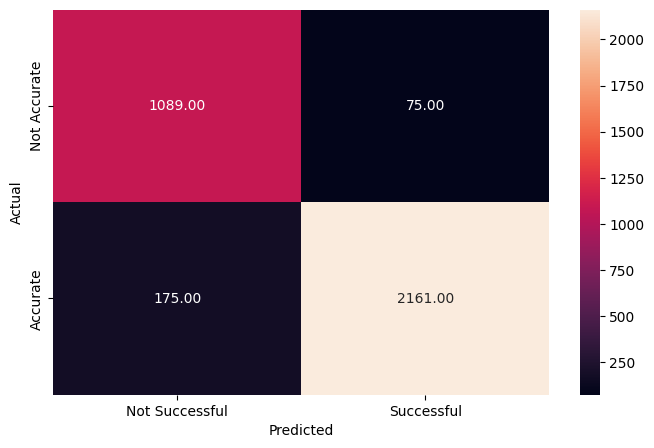

In [ ]:
# Checking performance on the training data
y_pred_train1 = dt_regressor.predict(X_train) # Changed d_tree to dt_regressor

metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.45      0.47      0.46       501
           1       0.73      0.71      0.72       999

    accuracy                           0.63      1500
   macro avg       0.59      0.59      0.59      1500
weighted avg       0.64      0.63      0.63      1500



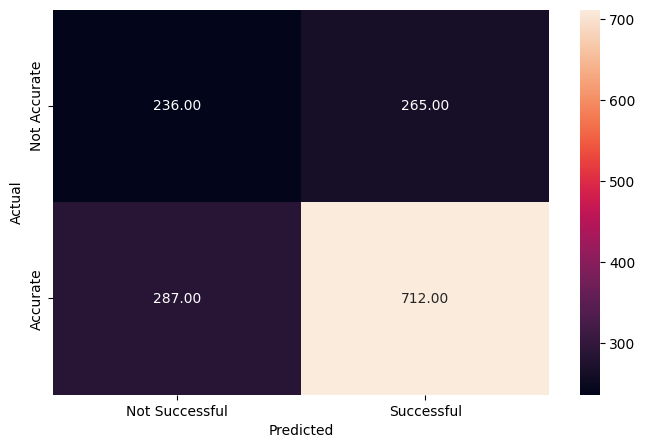

In [ ]:
# Checking performance on the testing data
y_pred_test1 = dt_regressor.predict(X_test) # Changed d_tree to dt_regressor

metrics_score(y_test, y_pred_test1)

Model Performance Summary
Training Data Performance:

The model performs exceptionally well on the training set with 93% accuracy.

Class 0 (Non-Turnover) has 0.89 F1-score, while Class 1 (Turnover) achieves 0.95 F1-score, indicating strong predictive power.
High precision and recall suggest minimal misclassification in the training set.
Test Data Performance:

The test accuracy drops to 69%, revealing a performance gap between training and test sets.
Class 0 (Non-Turnover) struggles with a lower 0.50 F1-score, meaning misclassification occurs frequently.
Class 1 (Turnover) is predicted more reliably, with 0.78 F1-score and strong recall (81%).

The disparity between training and test performance suggests possible overfitting, meaning the model may not generalize well to new data.

Key Takeaways:
The model performs well on the training set but struggles on the test set, indicating overfitting.

Further tuning, such as pruning the decision tree, adjusting hyperparameters, or using ensemble methods, could improve generalization.

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, dt_regressor.predict(X_test))) # Predict on X_test and compare with y_test

Accuracy: 0.632


The current model achieves an accuracy of 63.2%, indicating that while it captures some patterns, there is still room for improvement.

Analyzing Feature Importance in the Model
With this code, we will determine which features have the greatest impact on the model's predictions. This will help us understand how the model makes decisions and which factors contribute most to turnover intention.

Steps:

Extract feature importance values from the trained model.

Sort features by importance to identify key drivers.

Visualize the results using a bar chart for better interpretation.

By analyzing feature importance, we can gain insights into the most influential factors and potentially refine the model by focusing on the most relevant features

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(dt_regressor.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                           Importance
Job Satisfaction                             0.270786
Mental Health Absences                       0.198249
Stress Level                                 0.144110
Burnout Frequency_Occasionally               0.031332
Access to EAPs_Yes                           0.028640
Burnout Frequency_Never                      0.026666
Burnout Frequency_Often                      0.021835
Workplace Factor_Poor Work Environment       0.019603
Access to EAPs_No                            0.019302
Department_General Medicine                  0.017880
Workplace Factor_Heavy Workload              0.016878
Employee Type_Physician (General)            0.015745
Employee Type_Registered Nurse               0.015340
Department_Radiology                         0.014236
Employee Type_Medical Assistant              0.013448
Workplace Factor_Safety Concerns             0.012527
Employee Type_Pediatric Nurse                0.011672
Employee Type_Nursing Assist

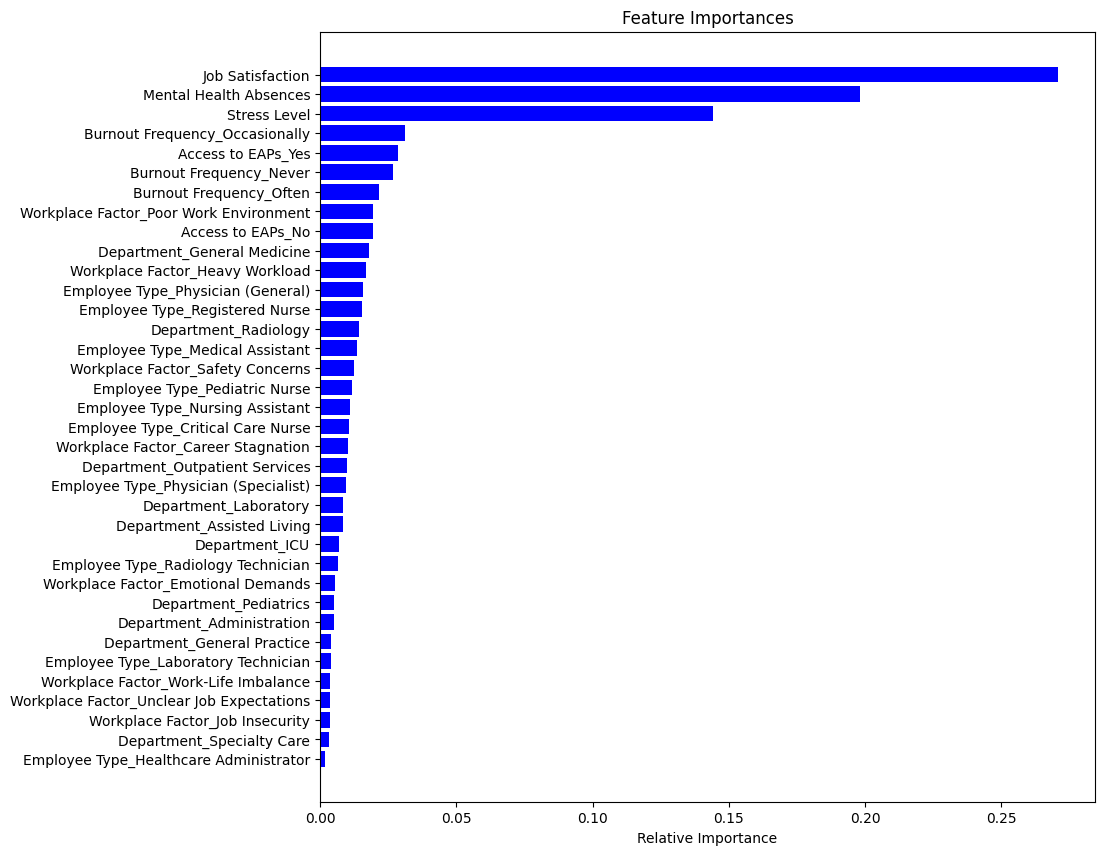

In [ ]:
# Plotting the feature importance
importances = dt_regressor.feature_importances_
indices = np.argsort(importances)

# Get feature names from X_train columns
features = X_train.columns

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'blue', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices]) # Now 'features' is defined
plt.xlabel('Relative Importance')
plt.show()

Model Insights: Feature Importance and Overfitting Risk


From examining the feature importance in the model, we observe that each feature is assigned a relatively small weight. This suggests that the model is giving equal attention to various features, which may indicate it is responding to noise in the data. As a result, this increases the likelihood of the model being prone to overfitting.

Potential Issues:

Overfitting: The model may memorize the training data too well, capturing noise rather than general patterns. This typically results in poor performance on unseen test data.

Lack of Feature Focus: If the model assigns similar importance to all features, it may fail to capture the most relevant factors driving turnover.

This code utilizes GridSearchCV to fine-tune the Decision Tree Classifier for better performance, specifically optimizing for recall on the turnover class. By adjusting key hyperparameters like max_depth, criterion, and min_samples_leaf, the model is optimized to improve its ability to identify turnover (class 1) while reducing overfitting.

In [ ]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.6, 1: 0.4})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), #depth [2, 3, 4, 5, 6, 7, 8, 9]
              'criterion': ['gini', 'entropy'], #use both gini and entropy to measure split quality
              'min_samples_leaf': [5, 10, 20, 25] #minimum number of samples to be a leaf node
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5) #=> chooses the best hyperparameters to use

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.6, 1: 0.4}, max_depth=2,
                       min_samples_leaf=5, random_state=7)

Now that the Decision Tree Classifier has been tuned and built, it's time to evaluate its performance on the test set to determine whether it is a good model. We'll assess its accuracy, precision, recall, and F1-score to understand how well it generalizes to unseen data.


              precision    recall  f1-score   support

           0       0.70      0.54      0.61      1164
           1       0.79      0.88      0.84      2336

    accuracy                           0.77      3500
   macro avg       0.75      0.71      0.72      3500
weighted avg       0.76      0.77      0.76      3500



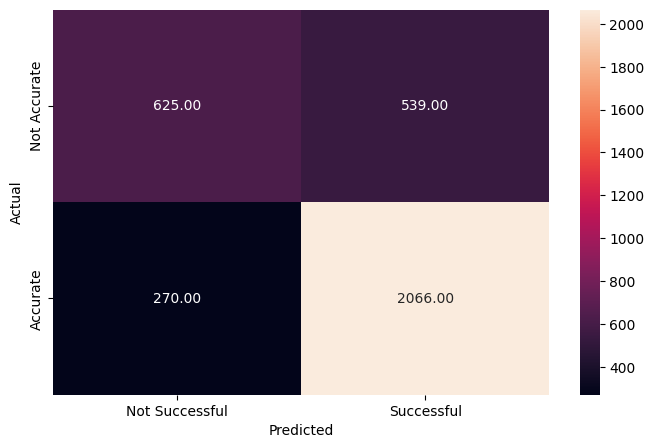

In [ ]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.70      0.53      0.61       501
           1       0.79      0.89      0.84       999

    accuracy                           0.77      1500
   macro avg       0.75      0.71      0.72      1500
weighted avg       0.76      0.77      0.76      1500



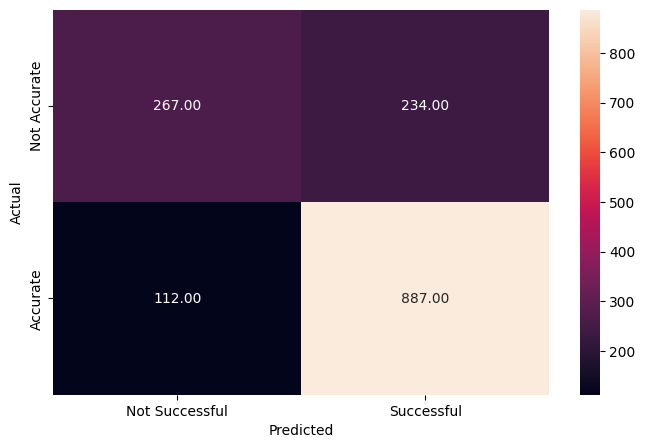

In [ ]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

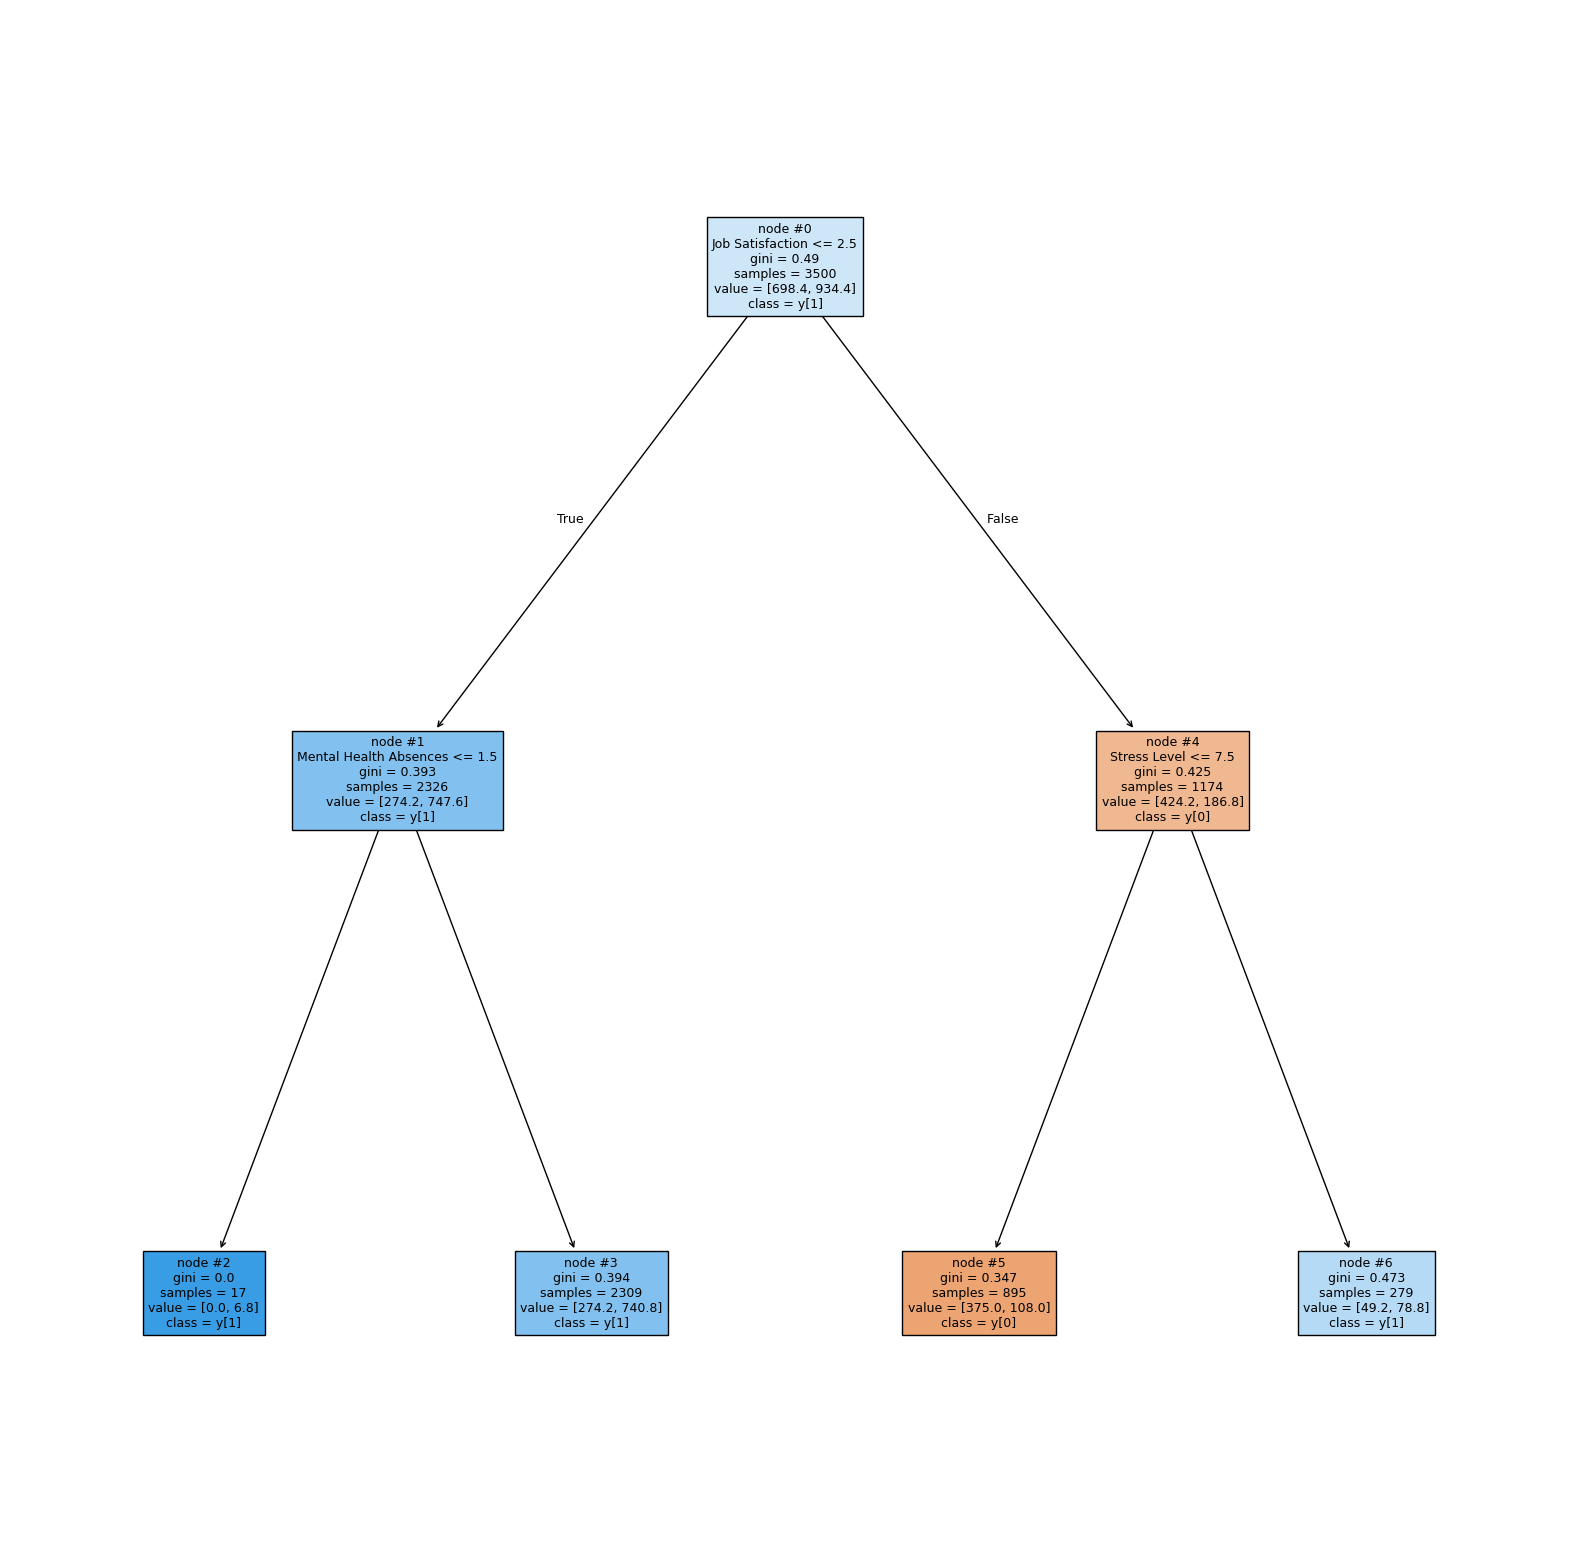

In [ ]:
#Visualize the tree
features = list(X.columns)
plt.figure(figsize = (20, 20))
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, d_tree_tuned.predict(X_test))) # Predict on X_test and compare with y_test

Accuracy: 0.7693333333333333


The tuned Decision Tree classifier shows good overall accuracy (~77%) and performs better at identifying class 1 (turnover). However, there is still room for improvement in class 0 (non-turnover), especially in terms of recall. Fine-tuning or considering other models might help further improve performance.

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                           Importance
Job Satisfaction                             0.812156
Stress Level                                 0.182072
Mental Health Absences                       0.005772
Workplace Factor_Job Insecurity              0.000000
Department_Pediatrics                        0.000000
Department_Radiology                         0.000000
Department_Specialty Care                    0.000000
Workplace Factor_Career Stagnation           0.000000
Workplace Factor_Emotional Demands           0.000000
Workplace Factor_Heavy Workload              0.000000
Workplace Factor_Poor Work Environment       0.000000
Access to EAPs_No                            0.000000
Department_Outpatient Services               0.000000
Workplace Factor_Unclear Job Expectations    0.000000
Workplace Factor_Work-Life Imbalance         0.000000
Burnout Frequency_Never                      0.000000
Burnout Frequency_Occasionally               0.000000
Burnout Frequency_Often     

Feature Importance Insights
From analyzing the feature importance in the tuned model, we observe that Job Satisfaction carries a significant weight of 81%, while Stress Level contributes around 18%. This suggests that the model is heavily relying on Job Satisfaction to make predictions, indicating that it is a strong predictor of turnover.

Key Insights:
Job Satisfaction (81%): The model places significant importance on job satisfaction, highlighting it as the most critical factor in predicting employee turnover.
Stress Level (18%): Stress level, while important, plays a smaller role compared to job satisfaction.
Blocking Noise: By focusing heavily on these two features, the model is likely filtering out noise from less relevant features, improving its ability to generalize and make accurate predictions.


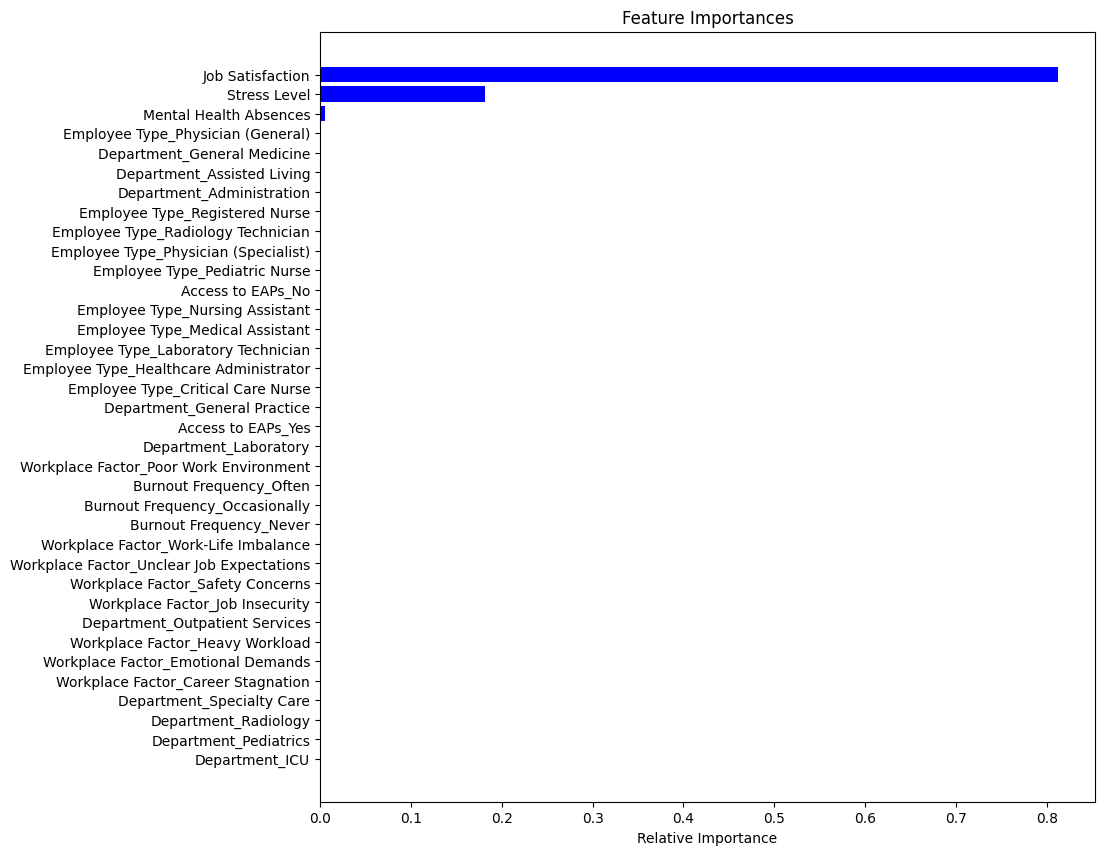

In [ ]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'blue', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Now that we have tuned and tested the Decision Tree Classifier, we will proceed to build the Random Forest Model. A Random Forest is an ensemble method that combines multiple decision trees to improve the overall performance and reduce overfitting.

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_regressor = RandomForestClassifier(random_state = 4)
rf_regressor.fit(X_train, y_train)


RandomForestClassifier(random_state=4)

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      1164
           1       0.93      0.97      0.95      2336

    accuracy                           0.93      3500
   macro avg       0.93      0.91      0.92      3500
weighted avg       0.93      0.93      0.93      3500



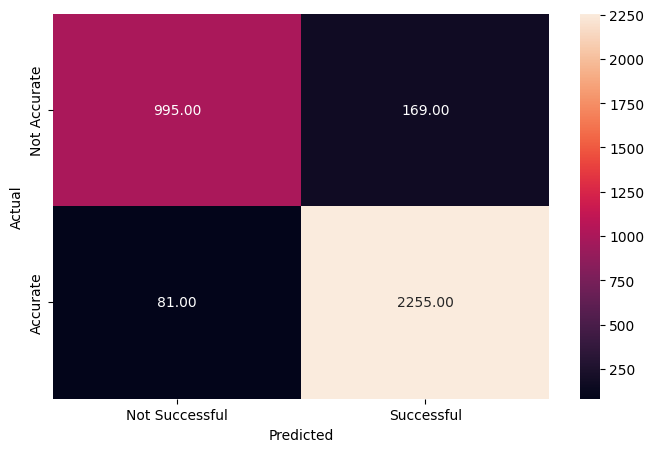

In [ ]:
# Checking performance on the training data
y_pred_train1 = rf_regressor.predict(X_train) # Changed d_tree to dt_regressor

metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.55      0.47      0.50       501
           1       0.75      0.81      0.78       999

    accuracy                           0.69      1500
   macro avg       0.65      0.64      0.64      1500
weighted avg       0.68      0.69      0.69      1500



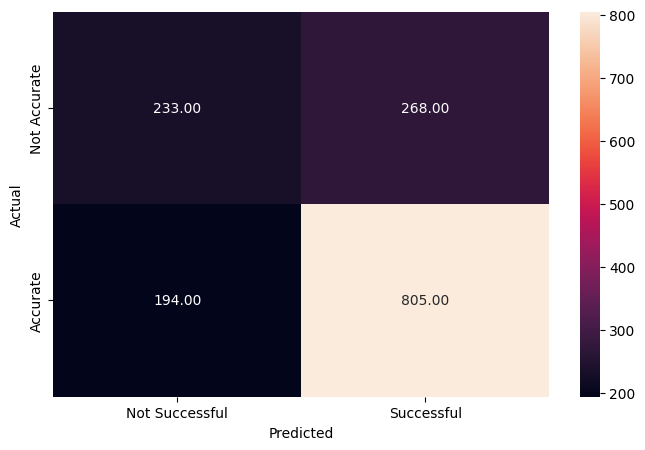

In [ ]:
# Checking performance on the testing data
y_pred_test1 = rf_regressor.predict(X_test) # Changed d_tree to dt_regressor

metrics_score(y_test, y_pred_test1)

The model performs excellently on the training data but struggles on test data, especially for Class 0. The high performance on the training data suggests that the model may be overfitting, and some regularization or tuning could help improve its generalization on unseen data.

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf_regressor.predict(X_test))) # Predict on X_test and compare with y_test

Accuracy: 0.692


The model currently achieves an overall accuracy of 69%, which indicates room for improvement.

Identifying Important Features in the Model
Now, we will analyze feature importance to understand how the model makes classification decisions. This will help us determine which factors play the most significant role in predicting turnover intention.

Steps Involved:
Extract feature importance values from the trained model.
Sort and visualize the most influential factors using a bar chart.


In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(rf_regressor.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                           Importance
Mental Health Absences                       0.324861
Job Satisfaction                             0.234832
Stress Level                                 0.139386
Burnout Frequency_Often                      0.023472
Access to EAPs_No                            0.022737
Access to EAPs_Yes                           0.022628
Burnout Frequency_Occasionally               0.021020
Burnout Frequency_Never                      0.019230
Workplace Factor_Heavy Workload              0.017253
Workplace Factor_Poor Work Environment       0.014624
Workplace Factor_Career Stagnation           0.012847
Workplace Factor_Work-Life Imbalance         0.010521
Department_General Medicine                  0.008540
Workplace Factor_Safety Concerns             0.008210
Employee Type_Registered Nurse               0.008148
Department_Outpatient Services               0.007120
Employee Type_Medical Assistant              0.007016
Department_ICU              

**Identifying Important Features in the Model**
Now, we will analyze feature importance to understand how the model makes classification decisions. This will help us determine which factors play the most significant role in predicting turnover intention.

Steps Involved:
Extract feature importance values from the trained model.
Sort and visualize the most influential factors using a bar chart.
Interpret insights—which features contribute the most to turnover predictions?
By examining feature importance, we can gain valuable insights into what drives employee attrition, which can help refine the model and guide decision-making.

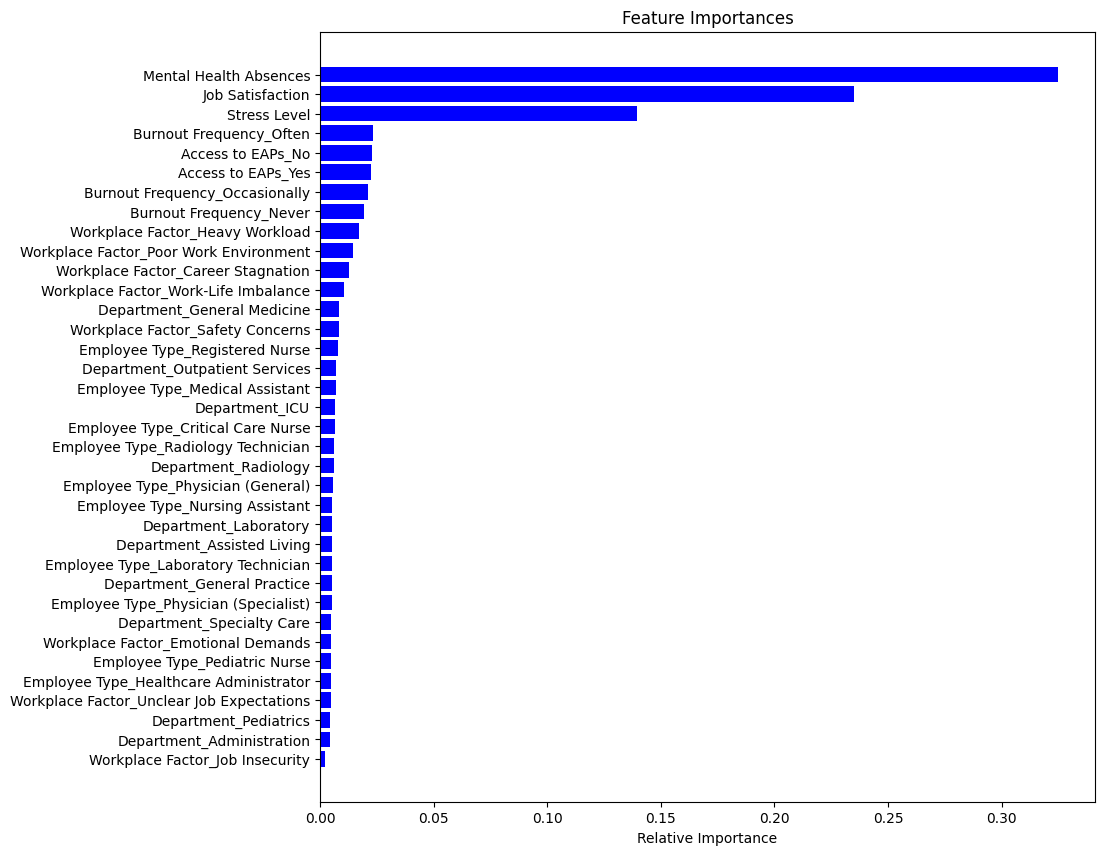

In [ ]:
# Plotting the feature importance
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'blue', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, rf_regressor.predict(X_test))) # Predict on X_test and compare with y_test

Accuracy: 0.692


Now lets focus on optimizing the hyperparameters for a machine learning model using a grid search approach. The hyperparameters included in the parameter grid are designed to enhance the performance and generalization of the model, which is likely a random forest or ensemble-based algorithm.

The key hyperparameters explored are:

n_estimators: The number of base estimators in the ensemble (100, 200).
max_depth: The maximum depth of the trees (6, 8, 10), controlling overfitting.
min_samples_leaf: The minimum number of samples required to be at a leaf node (5, 10), affecting model complexity.
max_features: The fraction of features to consider for splitting (0.6, 0.8), impacting model diversity.
max_samples: The fraction of samples used for training each estimator (0.7, 0.8), influencing the robustness of the model.
class_weight: Adjusts for imbalanced class distribution ('balanced') to ensure the model handles class imbalance effectively.

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 8)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 200],
    "max_depth": [6, 8, 10],
    "min_samples_leaf": [5, 10],
    "max_features": [0.6, 0.8],
    "max_samples": [0.7, 0.8],
    "class_weight": ['balanced']
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=10)  # Uses F1 score for evaluation

# Fit the model to the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_estimator_tuned.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_estimator_tuned.predict(X_test)

# Adjust the threshold if necessary to control class prediction
# For example, we can predict class 1 if the probability of class 1 is > 0.6
y_prob = rf_estimator_tuned.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_prob > 0.6).astype(int)

              precision    recall  f1-score   support

           0       0.70      0.56      0.62      1164
           1       0.80      0.88      0.84      2336

    accuracy                           0.77      3500
   macro avg       0.75      0.72      0.73      3500
weighted avg       0.76      0.77      0.76      3500



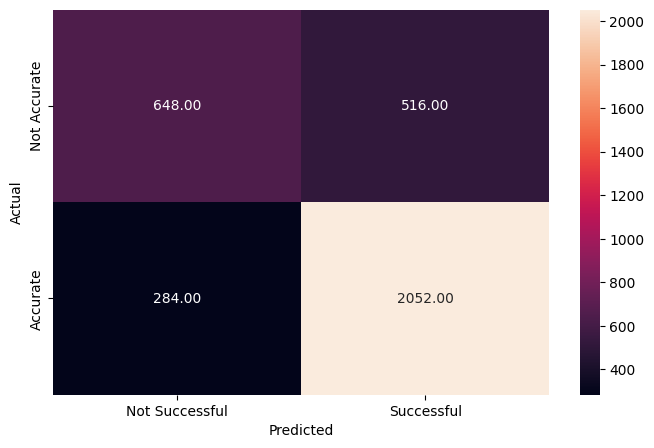

In [ ]:
# Checking performance on the training data
y_pred_train2 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.69      0.54      0.61       501
           1       0.79      0.88      0.83       999

    accuracy                           0.77      1500
   macro avg       0.74      0.71      0.72      1500
weighted avg       0.76      0.77      0.76      1500



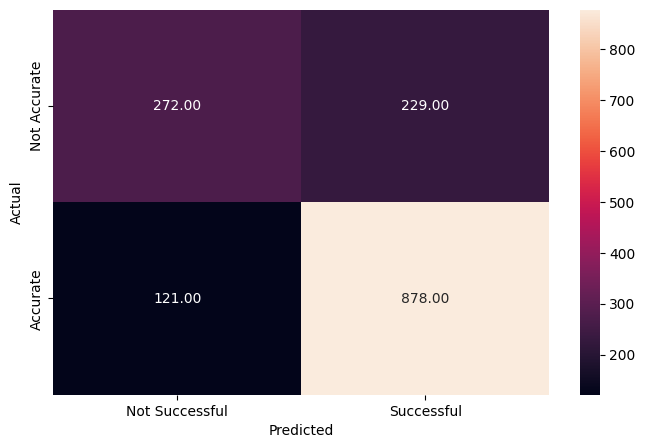

In [ ]:
# Checking performance on the testing data
y_pred_test2 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

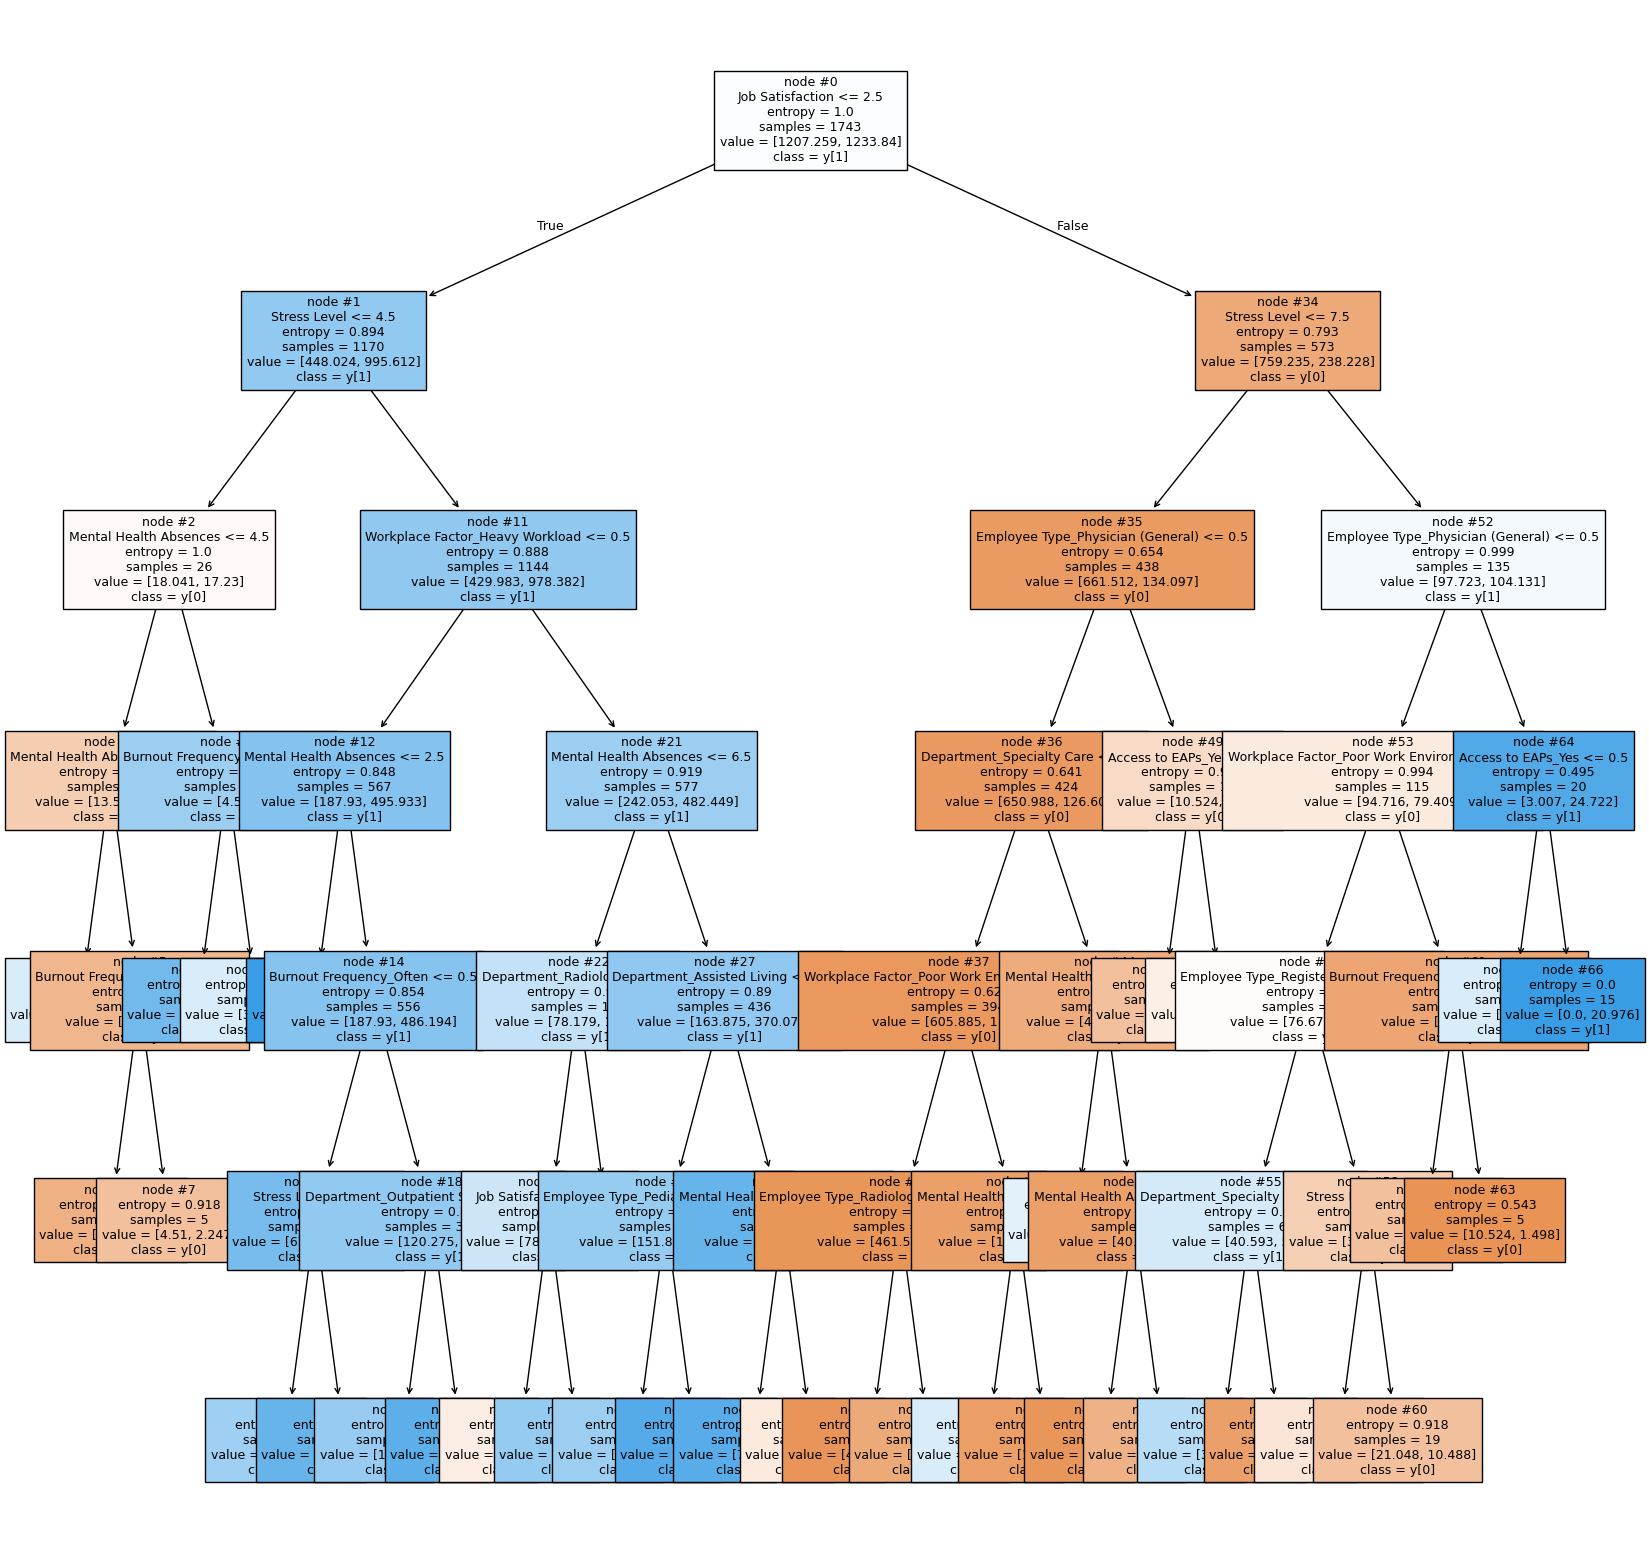

In [ ]:
#Visualize the first tree in the forest
features = list(X.columns)
plt.figure(figsize = (20, 20))
# Access the first tree using rf_estimator_tuned.estimators_[0]
tree.plot_tree(rf_estimator_tuned.estimators_[0], feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

The model demonstrates a balanced overall accuracy of 77% on both training and test sets. However, it shows a stronger ability to predict class 1, with higher precision and recall for this class. Class 0 prediction needs improvement, particularly in recall.

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                                           Importance
Job Satisfaction                             0.540837
Stress Level                                 0.185126
Mental Health Absences                       0.072187
Burnout Frequency_Often                      0.027909
Workplace Factor_Work-Life Imbalance         0.015633
Workplace Factor_Heavy Workload              0.014331
Workplace Factor_Poor Work Environment       0.010026
Workplace Factor_Career Stagnation           0.009295
Burnout Frequency_Never                      0.008939
Burnout Frequency_Occasionally               0.008760
Access to EAPs_No                            0.008668
Access to EAPs_Yes                           0.008436
Employee Type_Physician (General)            0.006871
Department_General Practice                  0.005166
Workplace Factor_Emotional Demands           0.004665
Employee Type_Critical Care Nurse            0.004511
Employee Type_Registered Nurse               0.004481
Department_ICU              

The most crucial feature is Job Satisfaction, followed by Stress Level and Mental Health Absences. Other factors like burnout frequency and workplace characteristics play smaller but still noteworthy roles in predicting the target variable.

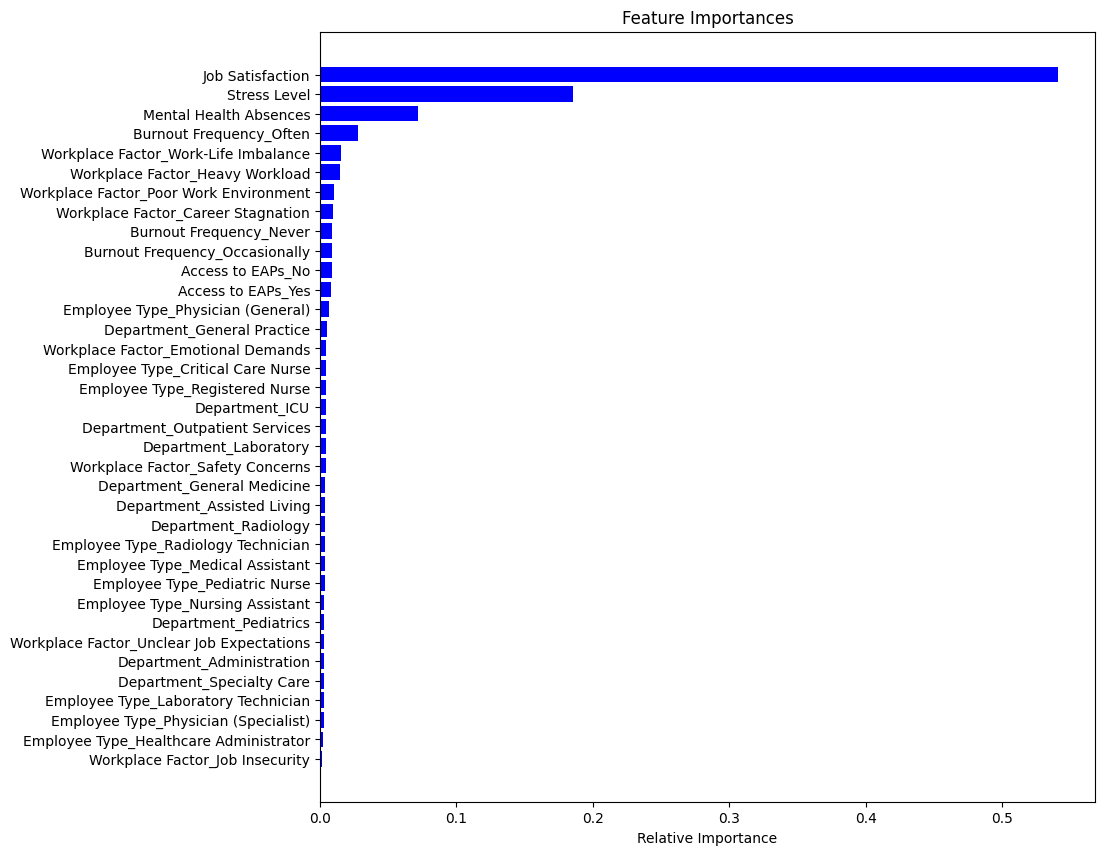

In [ ]:
# Plotting the feature importance
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'blue', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf_estimator_tuned.predict(X_test))) # Predict on X_test and compare with y_test

Accuracy: 0.7666666666666667


Conclusion and Recommendations:
Based on the data and the insights gained from the models, Job Satisfaction emerges as the most influential factor in determining whether an employee is likely to stay at the hospital. Stress Level also plays a significant role in employee retention, with higher stress being strongly associated with turnover. Furthermore, in our final model, we see that Mental Health Absences and Burnout Frequency also serve as potential indicators of employee turnover.

However, from both the model results and our exploratory data analysis, it is clear that turnover does not appear to be discriminatory across departments or occupations. This suggests that turnover is a broader issue that spans the entire hospital and is not specific to any one area or role. It is also important to note that the dataset is skewed, with approximately two-thirds of the employees showing turnover. This imbalance can limit the effectiveness of our model.

Recommendations:
Given that turnover is not specific to certain departments or occupations, it appears to be a hospital-wide issue that needs to be addressed at the management level. To better understand the root causes of job dissatisfaction, additional data should be gathered. Key factors such as salary, patient load, and hours worked could provide valuable insights into the reasons behind low job satisfaction.

While stress remains a strong predictor, it is clear that the most significant factor contributing to turnover is low job satisfaction. Addressing this key factor may be the most effective way to reduce turnover rates.


